# **Installing and Importing Libraries**

In [38]:
!pip install -q datascience                   # Package that is required by pandas profiling
!pip install -q pandas-profiling

In [39]:
!pip install -q --upgrade pandas-profiling

In [91]:
#-------------------------------------------------------------------------------------------------------------------------------
import pandas as pd                                                 # Importing for panel data analysis
from pandas_profiling import ProfileReport                          # Import Pandas Profiling (To generate Univariate Analysis)
import numpy as np                                                  # Importing package numpys (For Numerical Python)
#-------------------------------------------------------------------------------------------------------------------------------
import matplotlib.pyplot as plt                                     # Importing pyplot interface using matplotlib
import seaborn as sns                                               # Importin seaborm library for interactive visualization
%matplotlib inline
#-------------------------------------------------------------------------------------------------------------------------------
from sklearn import metrics
from sklearn.metrics import accuracy_score                          # For calculating the accuracy for the model
from sklearn.metrics import precision_score                         # For calculating the Precision of the model
from sklearn.metrics import recall_score                            # For calculating the recall of the model
from sklearn.metrics import confusion_matrix                        # For verifying model performance using confusion matrix
#-------------------------------------------------------------------------------------------------------------------------------
import warnings                                                     # Importing warning to disable runtime warnings
warnings.filterwarnings("ignore")                                   # Warnings will appear only once
#-------------------------------------------------------------------------------------------------------------------------------
from sklearn.model_selection import train_test_split                # To split the data in training and testing part
from sklearn.linear_model import LinearRegression                   # To create the Linear Regression Model
from sklearn.metrics import r2_score                                # R2 Sqaure for accuracy check

# **Data Acquisition & Description**

In [41]:
train = pd.read_csv("/content/train_data.csv")
train.head()

,age,sex,bmi,children,smoker,region,id,charges
0,24,male,23.655,0,no,northwest,693,2352.96845
1,28,female,26.510,2,no,southeast,1297,4340.44090
2,51,male,39.700,1,no,southwest,634,9391.34600
3,47,male,36.080,1,yes,southeast,1022,42211.13820
4,46,female,28.900,2,no,southwest,178,8823.27900


In [42]:
print("Shape of the Data is :", train.shape)

Shape of the Data is : (1003, 8)


In [43]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1003 entries, 0 to 1002
Data columns (total 8 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1003 non-null   int64  
 1   sex       1003 non-null   object 
 2   bmi       1003 non-null   float64
 3   children  1003 non-null   int64  
 4   smoker    1003 non-null   object 
 5   region    1003 non-null   object 
 6   id        1003 non-null   int64  
 7   charges   1003 non-null   float64
dtypes: float64(2), int64(3), object(3)
memory usage: 62.8+ KB


In [44]:
train.describe()

,age,bmi,children,id,charges
count,1003.000000,1003.000000,1003.000000,1003.000000,1003.000000
mean,39.255234,30.511780,1.104686,666.874377,13267.935817
std,14.039105,6.013107,1.204619,386.570442,12051.356547
min,18.000000,15.960000,0.000000,0.000000,1121.873900
25%,27.000000,26.210000,0.000000,329.500000,4780.839400
50%,39.000000,30.200000,1.000000,675.000000,9447.382400
75%,51.000000,34.430000,2.000000,1001.500000,16840.667970
max,64.000000,53.130000,5.000000,1337.000000,62592.873090


# **Data Pre-Processing**

In [45]:
profile = ProfileReport(df = train)
profile.to_file(output_file = 'Pre Profiling Report.html')
print('Accomplished!')

Summarize dataset:   0%|          | 0/5 [00:00<?, ?it/s]

Generate report structure:   0%|          | 0/1 [00:00<?, ?it/s]

Render HTML:   0%|          | 0/1 [00:00<?, ?it/s]

Export report to file:   0%|          | 0/1 [00:00<?, ?it/s]

Accomplished!


In [46]:
#Creating a New dataframe
missing_frame = pd.DataFrame(index = train.columns.values)

#Adding a column in the newly created dataframe
missing_frame['Null Frequency'] = train.isnull().sum().values

#Calculating the percentage of null values
nullpercent = train.isnull().sum().values/train.shape[0]

#Rounding the percentage of missing values and adding it to the dataFrame
missing_frame['Missing Null %age'] = np.round(nullpercent, decimals = 4) * 100

#Counting the number of 0 value present and adding it to the column in our dataFrame
missing_frame['Zero Frequency'] = train[train == 0].count().values

#Calculating the Percentage of Zero
zero_percent = train[train == 0].count().values / train.shape[0]

#Rounding and adding a column the dataframe which consists of the percent of 0 value present.
missing_frame['Missing %age'] = np.round(zero_percent, decimals = 4) * 100
missing_frame.transpose()

,age,sex,bmi,children,smoker,region,id,charges
Null Frequency,0.0,0.0,0.0,0.00,0.0,0.0,0.0,0.0
Missing Null %age,0.0,0.0,0.0,0.00,0.0,0.0,0.0,0.0
Zero Frequency,0.0,0.0,0.0,425.00,0.0,0.0,1.0,0.0
Missing %age,0.0,0.0,0.0,42.37,0.0,0.0,0.1,0.0


In [47]:
train['region'].value_counts()

southeast    259
northeast    251
southwest    247
northwest    246
Name: region, dtype: int64

In [48]:
train['children'].value_counts()

0    425
1    246
2    179
3    120
4     21
5     12
Name: children, dtype: int64

In [49]:
train.drop({'id'}, axis=1, inplace=True)

In [50]:
train.head()

,age,sex,bmi,children,smoker,region,charges
0,24,male,23.655,0,no,northwest,2352.96845
1,28,female,26.510,2,no,southeast,4340.44090
2,51,male,39.700,1,no,southwest,9391.34600
3,47,male,36.080,1,yes,southeast,42211.13820
4,46,female,28.900,2,no,southwest,8823.27900


In [203]:
train['smoker'].value_counts()

no     797
yes    206
Name: smoker, dtype: int64

# **Exploratory Data Analysis**

**1. Children count that patients have**

In [51]:
train.children.value_counts()

0    425
1    246
2    179
3    120
4     21
5     12
Name: children, dtype: int64

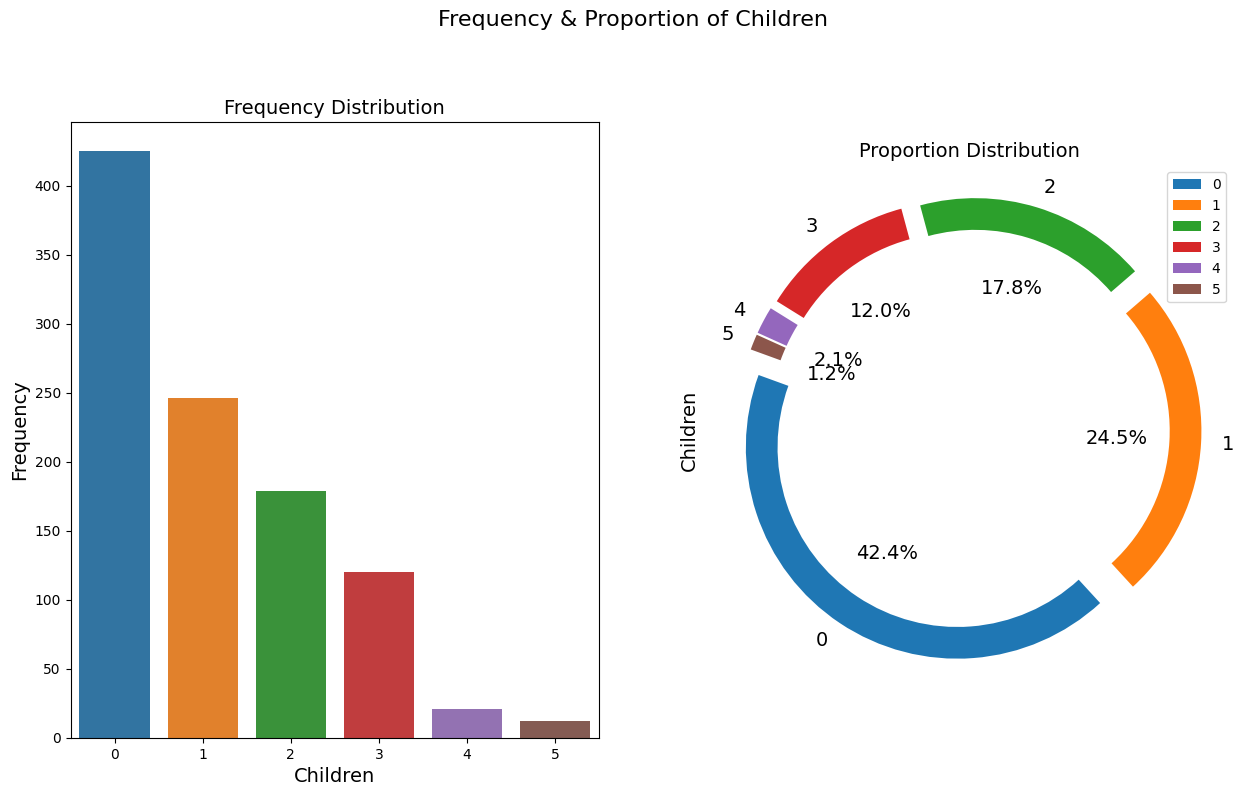

In [52]:
fig = plt.figure(figsize = [15, 8])
plt.subplot(1, 2, 1)
sns.countplot(x = 'children', data = train)
plt.xlabel(xlabel = 'Children', size = 14)
plt.ylabel(ylabel = 'Frequency', size = 14)
plt.title(label = 'Frequency Distribution', size = 14)

plt.subplot(1, 2, 2)
space = np.ones(6)/10
train['children'].value_counts().plot(kind = 'pie', explode = space, fontsize = 14, autopct = '%3.1f%%', wedgeprops = dict(width=0.15),
                                       shadow = False, startangle = 160, figsize = [15, 8], legend = True)
plt.ylabel(ylabel = 'Children', size = 14)
plt.title(label = 'Proportion Distribution', size = 14)
plt.suptitle(t = 'Frequency & Proportion of Children', y = 1.02, size = 16)

plt.show()

**2. Gender Distriution**

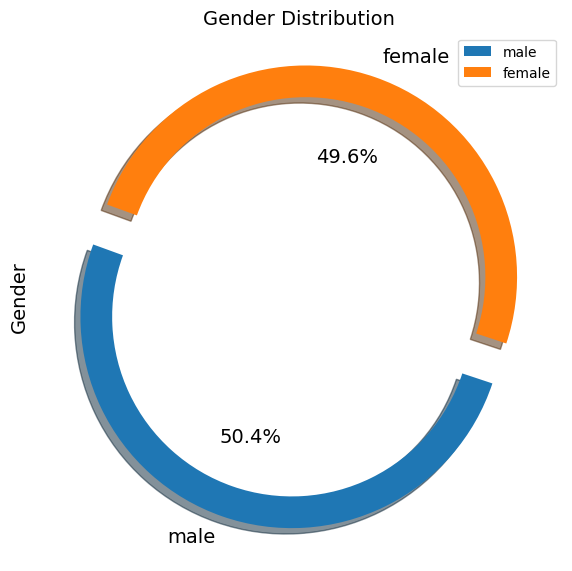

In [53]:
fig = plt.figure(figsize = [15, 8])
plt.subplot(1, 2, 1)
space = np.ones(2)/10
train['sex'].value_counts().plot(kind = 'pie', explode = space, fontsize = 14, autopct = '%3.1f%%', wedgeprops = dict(width=0.15),
                                       shadow = True, startangle = 160, figsize = [15, 8], legend = True)
plt.ylabel(ylabel = 'Gender', size = 14)
plt.title(label = 'Gender Distribution', size = 14)
plt.show()

**3. Region of residence of the beneficiary**

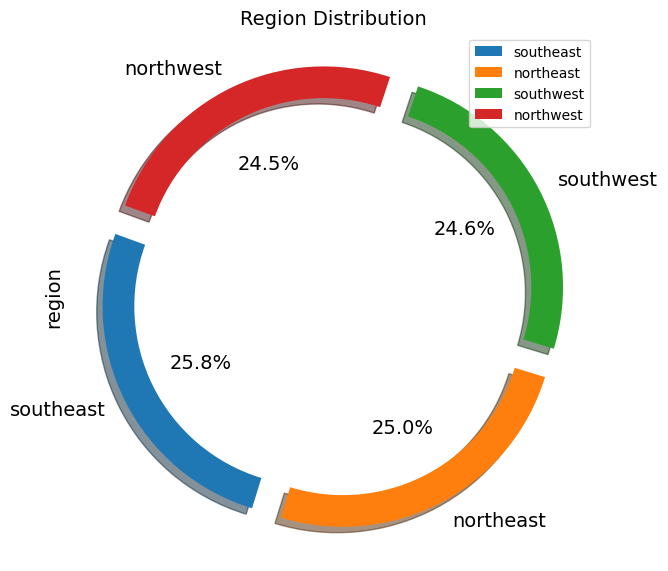

In [54]:
fig = plt.figure(figsize = [15, 8])
plt.subplot(1, 2, 1)
space = np.ones(4)/10
train['region'].value_counts().plot(kind = 'pie', explode = space, fontsize = 14, autopct = '%3.1f%%', wedgeprops = dict(width=0.15),
                                       shadow = True, startangle = 160, figsize = [15, 8], legend = True)
plt.ylabel(ylabel = 'region', size = 14)
plt.title(label = 'Region Distribution', size = 14)
plt.show()

**4. BMI frequency among the beneficiaries**

In [55]:
bmi = train.bmi.value_counts()

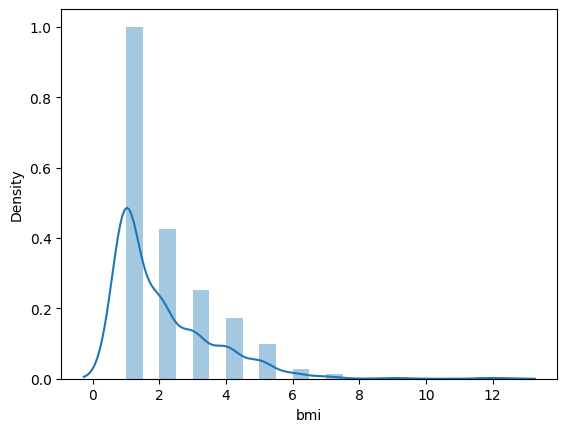

In [56]:
plot = sns.distplot(bmi)
plt.show()

# **Post Data Processing & Feature Selection**

Text(0.5, 1.0, 'Correlation between features')

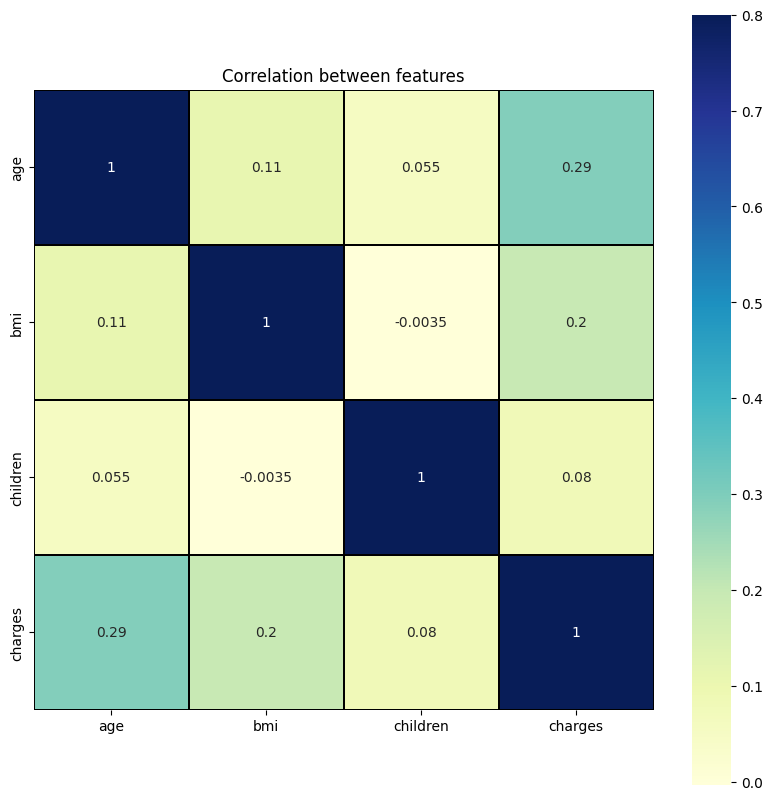

In [57]:
corr = train.corr()
plt.figure(figsize=(10,10))
sns.heatmap(corr,vmax=.8,linewidth=.01, square = True, annot = True,cmap='YlGnBu',linecolor ='black')
plt.title('Correlation between features')

In [58]:
profile = ProfileReport(df = train)
profile.to_file(output_file = 'Post Profiling Report.html')
print('Accomplished!')

Summarize dataset:   0%|          | 0/5 [00:00<?, ?it/s]

Generate report structure:   0%|          | 0/1 [00:00<?, ?it/s]

Render HTML:   0%|          | 0/1 [00:00<?, ?it/s]

Export report to file:   0%|          | 0/1 [00:00<?, ?it/s]

Accomplished!


In [60]:
train.dtypes

age           int64
sex          object
bmi         float64
children      int64
smoker       object
region       object
charges     float64
dtype: object

In [61]:
encoded_data = pd.get_dummies(train)
encoded_data.head()

,age,bmi,children,charges,sex_female,sex_male,smoker_no,smoker_yes,region_northeast,region_northwest,region_southeast,region_southwest
0,24,23.655,0,2352.96845,0,1,1,0,0,1,0,0
1,28,26.510,2,4340.44090,1,0,1,0,0,0,1,0
2,51,39.700,1,9391.34600,0,1,1,0,0,0,0,1
3,47,36.080,1,42211.13820,0,1,0,1,0,0,1,0
4,46,28.900,2,8823.27900,1,0,1,0,0,0,0,1


In [82]:
X = encoded_data.drop('charges', axis=1)
y = encoded_data['charges']

In [87]:
y[].value_counts()

2352.96845     1
11554.22360    1
1635.73365     1
39722.74620    1
7144.86265     1
              ..
7985.81500     1
8782.46900     1
19933.45800    1
12979.35800    1
10214.63600    1
Name: charges, Length: 1003, dtype: int64

In [89]:
X_train, X_val, y_train, y_val = train_test_split(X, y, test_size = 0.1, random_state = 42)

print('Training Data Shape:', X_train.shape, y_train.shape)
print('Testing Data Shape:', X_val.shape, y_val.shape)

Training Data Shape: (902, 11) (902,)
Testing Data Shape: (101, 11) (101,)


# **Model Development & Evaluation**

### Fitting Model

In [94]:
lr = LinearRegression()
lr.fit(X_train,y_train)

LinearRegression()

In [96]:
pred_train_lr = lr.predict(X_train)
pred_val_lr = lr.predict(X_val)

In [97]:
lr.intercept_

-438.70728925882577

In [99]:
lr.coef_

array([   264.39021012,    322.04417762,    450.2497163 ,     86.80816507,
          -86.80816507, -11852.19227295,  11852.19227295,    591.56751247,
          -70.64190467,   -155.12826933,   -365.79733847])

In [100]:
r_sq_train = r2_score(y_train, pred_train_lr)
r_sq_val = r2_score(y_val, pred_val_lr)

In [101]:
print("The R-Squared Value for the train data is: ", round(r_sq_train,2))
print("The R-Squared Value for the validation data is: ", round(r_sq_val,2))

The R-Squared Value for the train data is:  0.75
The R-Squared Value for the validation data is:  0.72


### Testing Model

In [123]:
test = pd.read_csv("/content/test_data.csv")

In [124]:
test.head()

,age,sex,bmi,children,smoker,region,id
0,45,female,25.175,2,no,northeast,764
1,36,female,30.020,0,no,northwest,887
2,64,female,26.885,0,yes,northwest,890
3,46,male,25.745,3,no,northwest,1293
4,19,male,31.920,0,yes,northwest,259


In [125]:
test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 335 entries, 0 to 334
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       335 non-null    int64  
 1   sex       335 non-null    object 
 2   bmi       335 non-null    float64
 3   children  335 non-null    int64  
 4   smoker    335 non-null    object 
 5   region    335 non-null    object 
 6   id        335 non-null    int64  
dtypes: float64(1), int64(3), object(3)
memory usage: 18.4+ KB


In [126]:
test.drop({'id'}, axis=1, inplace=True)

In [127]:
test_emb = pd.get_dummies(test)

In [128]:
test_emb.head()

,age,bmi,children,sex_female,sex_male,smoker_no,smoker_yes,region_northeast,region_northwest,region_southeast,region_southwest
0,45,25.175,2,1,0,1,0,1,0,0,0
1,36,30.020,0,1,0,1,0,0,1,0,0
2,64,26.885,0,1,0,0,1,0,1,0,0
3,46,25.745,3,0,1,1,0,0,1,0,0
4,19,31.920,0,0,1,0,1,0,1,0,0


In [130]:
pred_test_lr = lr.predict(test_emb)
pred_test_lr

array([ 9.29299718e+03,  6.91108047e+03,  3.70087824e+04,  9.35537654e+03,
        2.65590991e+04,  1.05117070e+04, -4.94650359e-01,  1.66797084e+04,
        1.35854583e+03,  1.10969673e+04,  2.81012129e+04,  9.14347981e+03,
        5.28763336e+03,  3.83228183e+04,  4.02130089e+04,  3.70387881e+04,
        1.52412456e+04,  3.60182327e+04,  9.28631890e+03,  3.14565880e+04,
        3.81435461e+03,  1.00244136e+04,  2.07005193e+03,  7.02302923e+03,
        1.13514086e+04,  1.31889512e+04,  1.45972745e+04,  6.00469452e+03,
        1.02806905e+04,  1.93259930e+03,  9.24261294e+03,  1.30445646e+04,
        4.42265522e+03,  3.43250349e+03,  4.24221544e+03,  1.29303877e+04,
        1.93452168e+03,  8.87826093e+03,  3.33991179e+04,  3.24758009e+04,
        3.91523732e+03,  3.91456968e+03,  1.42153943e+04,  1.13499175e+04,
        8.60561972e+03,  1.21619819e+04,  5.00830624e+03,  3.21628918e+03,
        3.54750058e+04,  8.92703593e+03,  1.59875672e+04,  2.13487500e+03,
        1.20901947e+04,  